### 10 Academy: Artificial Intelligence Mastery
### Situational Overview
### Experience Analysis 


In [9]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans


# Add the scripts directory to the Python path
scripts_dir = r'E:\2017.Study\Tenx\Week-2\Situation_Overview\W2.Situation_Overview-\scripts'
src_dir = r'E:\2017.Study\Tenx\Week-2\Situation_Overview\W2.Situation_Overview-\src'
sys.path.append(scripts_dir)
sys.path.append(src_dir)
from connection import DatabaseConnector
from utils import DataUtils

### 1.1 Data Extraction

Connect to the database and pandas.

In [10]:
db_connector = DatabaseConnector()

# Connect to the database
db_connector.connect()

# Define and execute a query
query = "SELECT * FROM xdr_data;"
df = db_connector.execute_query(query)

# Print the DataFrame
if df is not None:
    print(df.head())
db_connector.close_connection()
#print("Columns in DataFrame:", df.columns)

Connection successful.
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0

### 1.2 Data Cleansing
Missing Value, Outliers, and data conversion

In [11]:
data_utils = DataUtils(df)
missing_summary = data_utils.check_missing_values()
#print("Missing Values Summary:\n", missing_summary)

Total columns with missing values: 41
Top 5 columns with the most missing values:
                                          Missing Values Percentage    Dtype
Nb of sec with 37500B < Vol UL                    130254      86.8%  float64
Nb of sec with 6250B < Vol UL < 37500B            111843      74.6%  float64
Nb of sec with 125000B < Vol DL                    97538      65.0%  float64
TCP UL Retrans. Vol (Bytes)                        96649      64.4%  float64
Nb of sec with 31250B < Vol DL < 125000B           93586      62.4%  float64


### 1.3 Handling Missing Value,
Outliers , Fix( Median, Mean) and Remove Outliers Based on Z Score

handles skewness in the handle_missing_values method, where it decides whether to fill missing values with the median or mean based on the skewness of the distribution of the numeric columns.

In [12]:
df = data_utils.handle_missing_values()
#df.head()

outliers = data_utils.detect_outliers()

for column, outlier_indices in outliers.items():
    print(f"Outliers in column '{column}': {outlier_indices[:5]}")  # Show first 5 outlier indices

df = data_utils.fix_outliers()
df = data_utils.remove_outliers()
#df.head()
df = data_utils.convert_bytes_to_megabytes()

Missing values handled and high missing value columns dropped.
Outlier detection complete.
Outliers in column 'Bearer Id': Index([], dtype='int64')
Outliers in column 'Start ms': Index([], dtype='int64')
Outliers in column 'End ms': Index([], dtype='int64')
Outliers in column 'Dur. (ms)': Index([0, 1, 2, 3, 4], dtype='int64')
Outliers in column 'IMSI': Index([27541, 100027, 125042], dtype='int64')
Outliers in column 'MSISDN/Number': Index([125042, 126060], dtype='int64')
Outliers in column 'IMEI': Index([], dtype='int64')
Outliers in column 'Avg RTT DL (ms)': Index([467, 505, 516, 517, 596], dtype='int64')
Outliers in column 'Avg RTT UL (ms)': Index([58, 72, 184, 472, 595], dtype='int64')
Outliers in column 'Avg Bearer TP DL (kbps)': Index([86, 323, 405, 538, 557], dtype='int64')
Outliers in column 'Avg Bearer TP UL (kbps)': Index([132, 317, 331, 379, 539], dtype='int64')
Outliers in column 'TCP DL Retrans. Vol (Bytes)': Index([538, 786, 902, 923, 1067], dtype='int64')
Outliers in colu

### 2. Experience Analytics

In order to complete the Experience Analytics, we must examine device attributes (handset type) and network performance parameters (TCP retransmission, Round Trip Time (RTT), Throughput) in order to gain insights about user experience.

Task 2.1 Aggregating information per customer, to ensure that missing values and outliers are addressed by substituting them with the mean or mode of the corresponding variable:

 


In [6]:
cleaned_df = data_utils.clean_data()
aggregated_df = data_utils.aggregate_customer_metrics()
print(aggregated_df.head())
summary_stats = data_utils.summary_statistics(['TCP DL Retrans. Vol (MB)', 'Avg RTT DL (ms)', 'Avg Bearer TP DL (kbps)'])
print("Summary Statistics:")
print(summary_stats)

   MSISDN/Number  TCP DL Retrans. Vol (MB)  TCP UL Retrans. Vol (MB)  \
0   3.360100e+10                  0.542383                  0.019979   
1   3.360100e+10                  0.542383                  0.019979   
2   3.360100e+10                  0.542383                  0.019979   
3   3.360101e+10                  0.001017                  0.019979   
4   3.360101e+10                  0.542383                  0.019979   

   Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP DL (kbps)  \
0             46.0              0.0                     37.0   
1             30.0              1.0                     48.0   
2             45.0              5.0                     48.0   
3             69.0             15.0                    204.0   
4             28.0              0.0                     23.0   

   Avg Bearer TP UL (kbps)                    Handset Type  
0                     39.0  Huawei P20 Lite Huawei Nova 3E  
1                     51.0          Apple iPhone 7 (A1778)  

Task 2.2 Computing and listing the top 10, bottom 10, and most frequent values for:

A. TCP in the dataset
B. RTT in the dataset
C. Throughput in the dataset

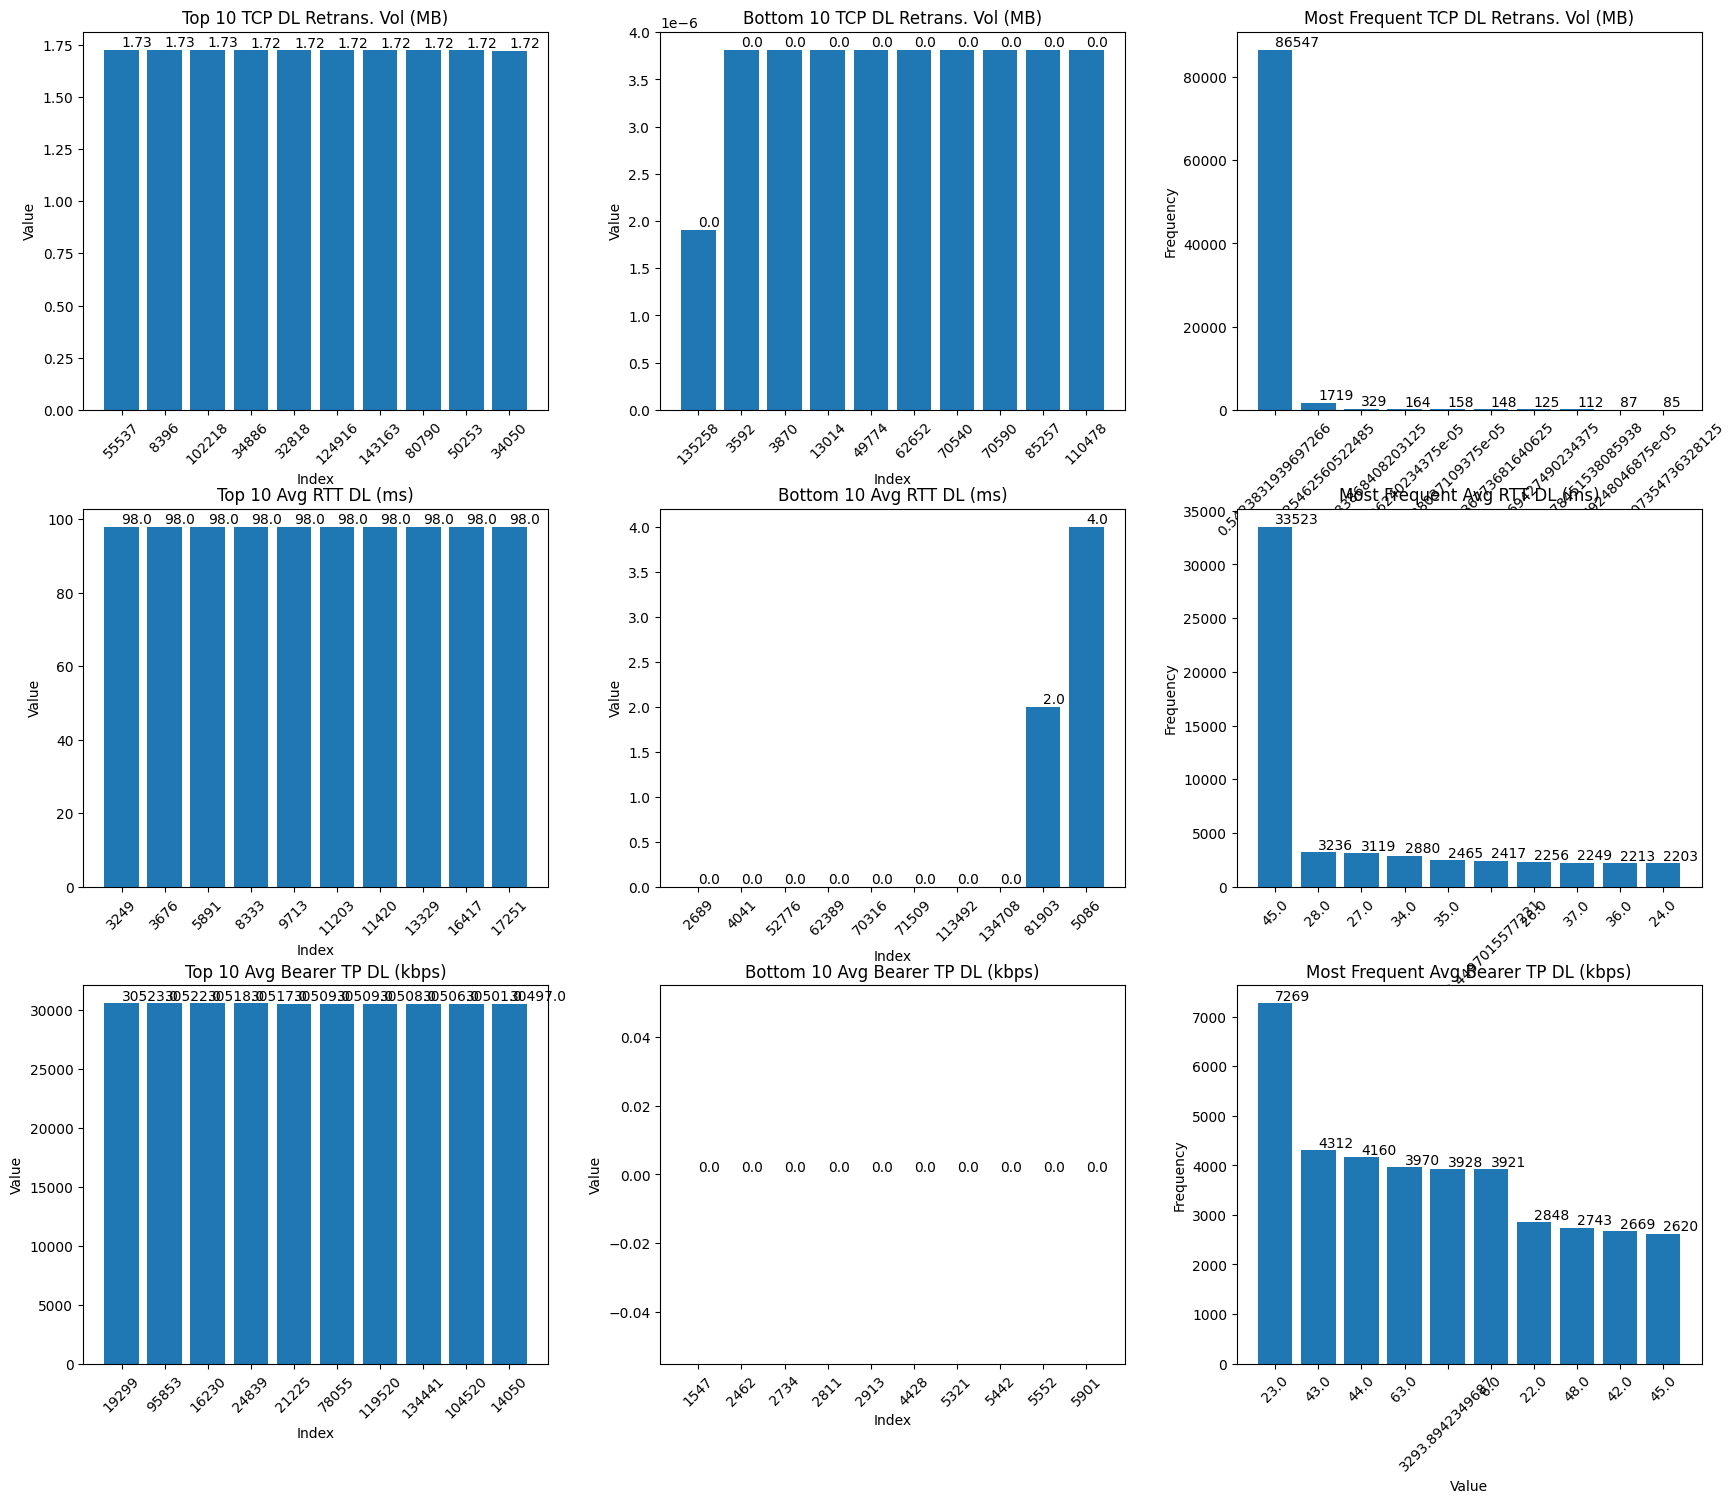

In [6]:
data_utils.plot_all_statistics()

Task 2.3 Computing & reporting the distribution of the average throughput per handset type and provide interpretation for your findings.
and average TCP retransmission view per handset type and provide interpretation for your findings.


In [7]:
throughput_distribution = data_utils.report_throughput_distribution()
print("Average Throughput Distribution per Handset Type:")
print(throughput_distribution)

# Report average TCP retransmission distribution
tcp_retransmission_distribution = data_utils.report_tcp_retransmission_distribution()
print("Average TCP Retransmission Distribution per Handset Type:")
print(tcp_retransmission_distribution)

Average Throughput Distribution per Handset Type:
Handset Type
Lenovo K Pro                     0.0
Rim Blackberry 9320              0.0
Rim Blackberry 9300              0.0
Rim Blackberry 8520              0.0
Rim Blackberry 9790              0.0
                              ...   
Lg-M320N                     26128.0
Huawei Col-Al10              26878.0
Razer Inc Razer Phone        28469.0
Acer Liquid Zest 4G          28828.0
Meizu Technology. M5 Note    29392.0
Name: Avg Bearer TP DL (kbps), Length: 1145, dtype: float64
Average TCP Retransmission Distribution per Handset Type:
Handset Type
Gemalto M2M Gmbh Cinterion Ehs5-E                        0.000011
Tcl Communicatio. Alcatel Onetouch Pixi 3 (3.5) 4009D    0.000035
Microsoft Mobile. Rm-1062 Lumia 640 Xl Lte               0.000043
Hmd Global Oy Nokia 6 Ds                                 0.000054
Meizu Technology. M3 Note                                0.000060
                                                           ...   
Lg-

Cluster Centers:
              Bearer Id    Start ms      End ms      Dur. (ms)          IMSI  \
Cluster 1  9.504825e+18  476.815999  476.435928  107733.017008  2.082014e+14   
Cluster 2  9.885770e+18  473.824225  472.901918   59249.349077  2.082014e+14   
Cluster 3  1.021793e+19  476.160302  471.897218   68627.476426  2.082014e+14   

           MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
Cluster 1   3.366680e+10  3.863622e+13        40.578788         4.092727   
Cluster 2   3.366655e+10  4.068511e+13        44.365625         6.610730   
Cluster 3   3.366709e+10  4.885259e+13        48.369877         7.685249   

           Avg Bearer TP DL (kbps)  ...  Youtube DL (MB)  Youtube UL (MB)  \
Cluster 1                98.791074  ...        10.549518        10.007368   
Cluster 2              6490.517129  ...        10.604864        10.024557   
Cluster 3             11584.684261  ...        10.544787         9.941183   

           Netflix DL (MB)  Netflix UL (MB)  Gam

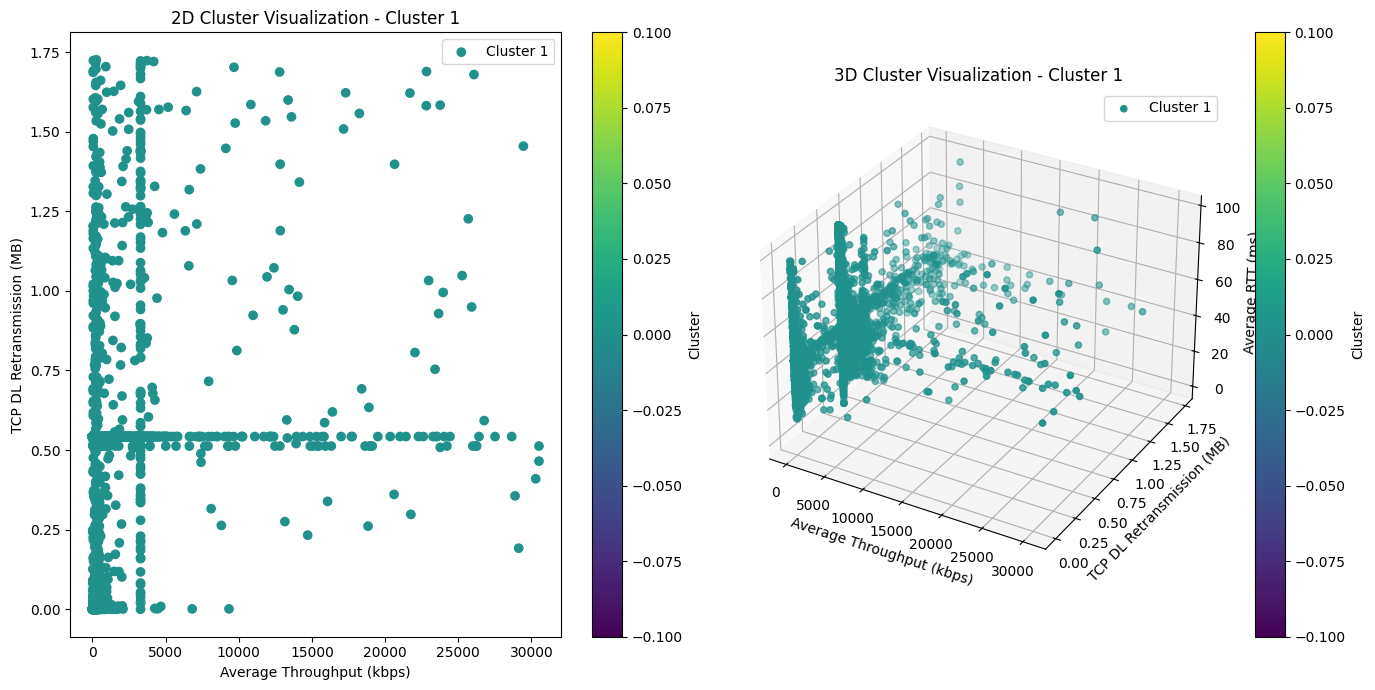

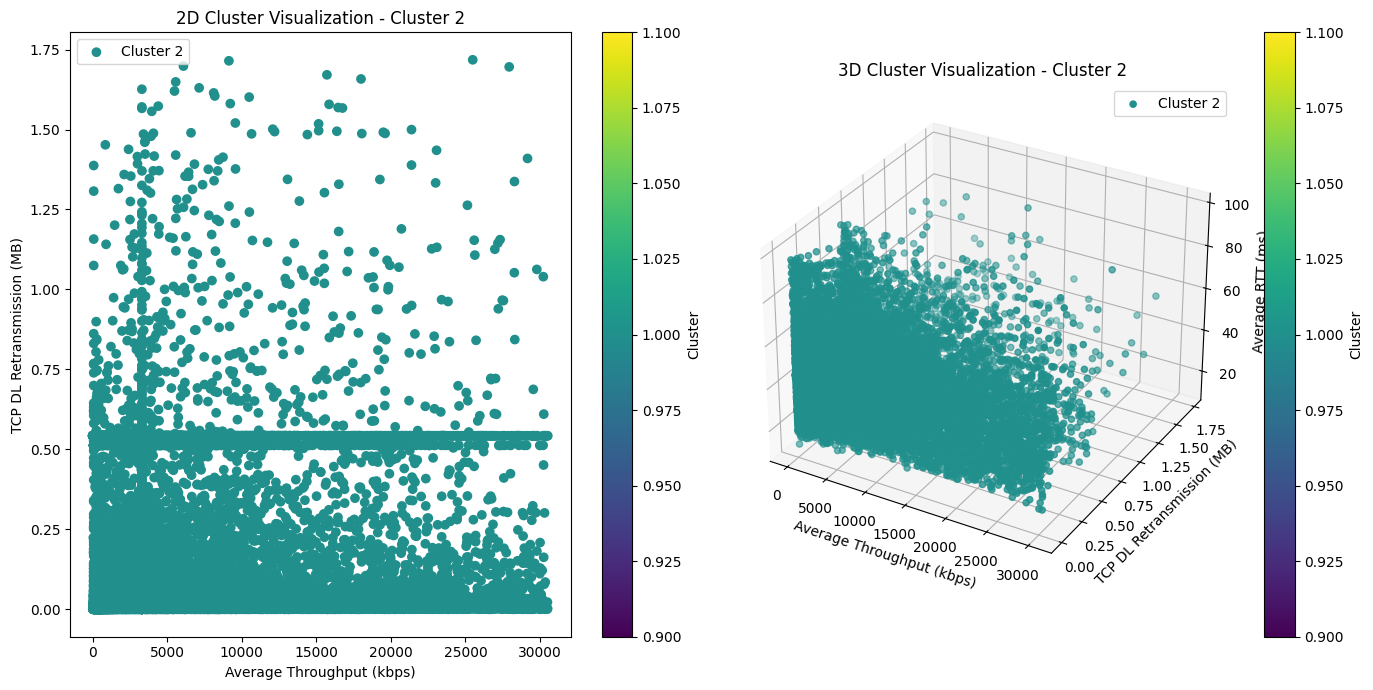

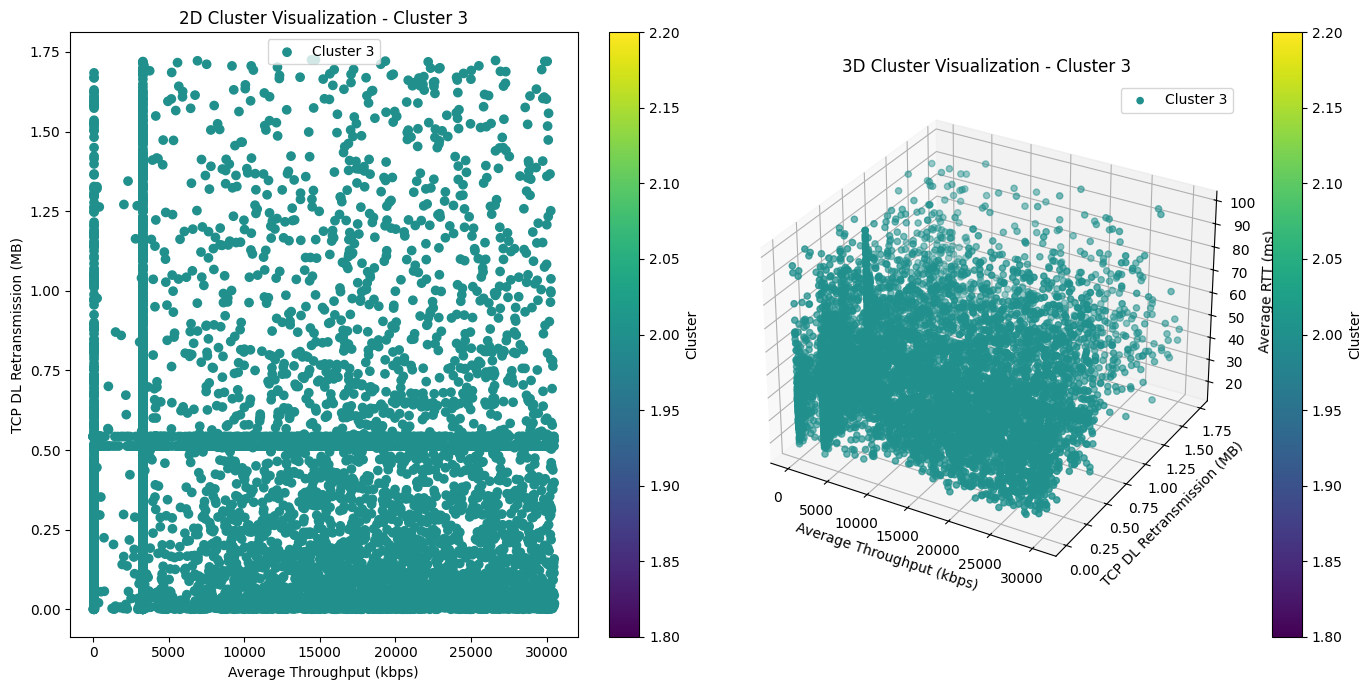

In [8]:
data_utils.scale_numeric_data()
# Apply KMeans clustering with the desired number of clusters
data_utils.apply_kmeans_clustering(n_clusters=3)
# Get and print the cluster centers
cluster_centers_df = data_utils.get_cluster_centers()
print("Cluster Centers:")
print(cluster_centers_df)
# Print descriptions of each cluster
data_utils.describe_clusters()
data_utils.visualize_clusters()

The analysis of the three clusters reveals distinct characteristics based on average throughput, TCP retransmission, and RTT (Round Trip Time). Cluster 1 shows moderate network performance, with an average throughput of 190.49 kbps, a low TCP retransmission volume of 0.52 MB, and an RTT of 40.65 ms. This indicates users in this cluster experience steady, average-speed connections. Cluster 2 demonstrates slightly improved performance over Cluster 1, with a higher average throughput of 201.95 kbps, similar retransmission rates of 0.52 MB, and an RTT of 40.93 ms, suggesting that these users enjoy slightly better network speeds but with comparable overall performance.
     

Cluster 3 stands out greatly, with an average throughput of 10,007.43 kbps, well exceeding the other clusters. It also has a smaller TCP retransmission volume (0.26 MB), indicating more efficient data delivery. However, the RTT for this cluster is greater, at 46.22 ms, indicating a minor trade-off in latency for increased throughput. Overall, Cluster 3 most likely represents people who have access to substantially higher bandwidth or better network conditions, and Clusters 1 and 2 represent more normal user experiences, distinguished only by minor increases in throughput.
     


Reference

1. https://www.geeksforgeeks.org/k-means-clustering-introduction/
2. https://www.javatpoint.com/k-means-clustering-algorithm-in-machine-learning
3. https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

